# Predicting Heart Disease Using Machine Learning
I will be using the Cleveland Heart Disease dataset from the UCI Machine Learning Repository.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.cm import rainbow
# filtering out warnings that I know are harmless or not relevant
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Next, we import the split library, the StandardScaler library to perform scaling and SimpleImputer to handle the missing values


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


Next, let's import the following modules from the scikit-learn library to use three different machine learning algorithms mentioned below

In [3]:
# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For Random Forest
from sklearn.ensemble import RandomForestClassifier


# For K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# For evaluating the models
from sklearn.metrics import accuracy_score

# For cross-validation
from sklearn.model_selection import cross_val_score

# For Sampling
from imblearn.over_sampling import RandomOverSampler


Now that we have all the necessary imports to code stuff up, let's import the dataset I downloaded 

In [4]:
data = pd.read_csv('/Users/sonamgrg/Downloads/processed_cleveland.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


The dataset contains 303 entries (rows) and 14 columns. It seems that the ca and thal columns are of type "object", which might indicate that they contain non-numeric values. It's a good idea to investigate these columns further to understand their unique values and potential impact on the analysis.
Now, I'll be checking whether we have any missing values or not

In [6]:
missing_values = data.isna().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


It seems that the missing values have already been handled or replaced with appropriate values in the dataset. The output shows that there are no missing values in any of the columns since the count of missing values for each column is 0.

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Based on this summary, we can gather the following information for some of the numerical features:

**age**: The patients' ages range from 29 to 77, with an average age of approximately 54.

**trestbps**: Resting blood pressure ranges from 94 to 200, with an average of around 132.

**chol**: Serum cholesterol levels range from 126 to 564, with an average of about 247.

**thalach**: Maximum heart rate achieved ranges from 71 to 202, with an average of roughly 150.

**oldpeak**: ST depression induced by exercise relative to rest ranges from 0 to 6.2, with an average of approximately 1.04.

Next, let's visualize the distribution of target variable num.


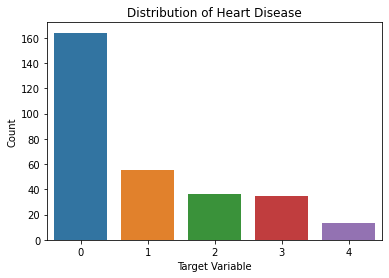

In [8]:
# Visualize the distribution of target variable
sns.countplot(x='num', data=data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()


The target variable seems to represent different levels or stages of heart disease severity (0, 1, 2, 3, and 4)
Next, let's visualize the correlation between features


The problem I'm encountering while attempting to visualize the correlation between features is that I repeatedly encounter errors because of non-numeric values, such as '?' in our case.

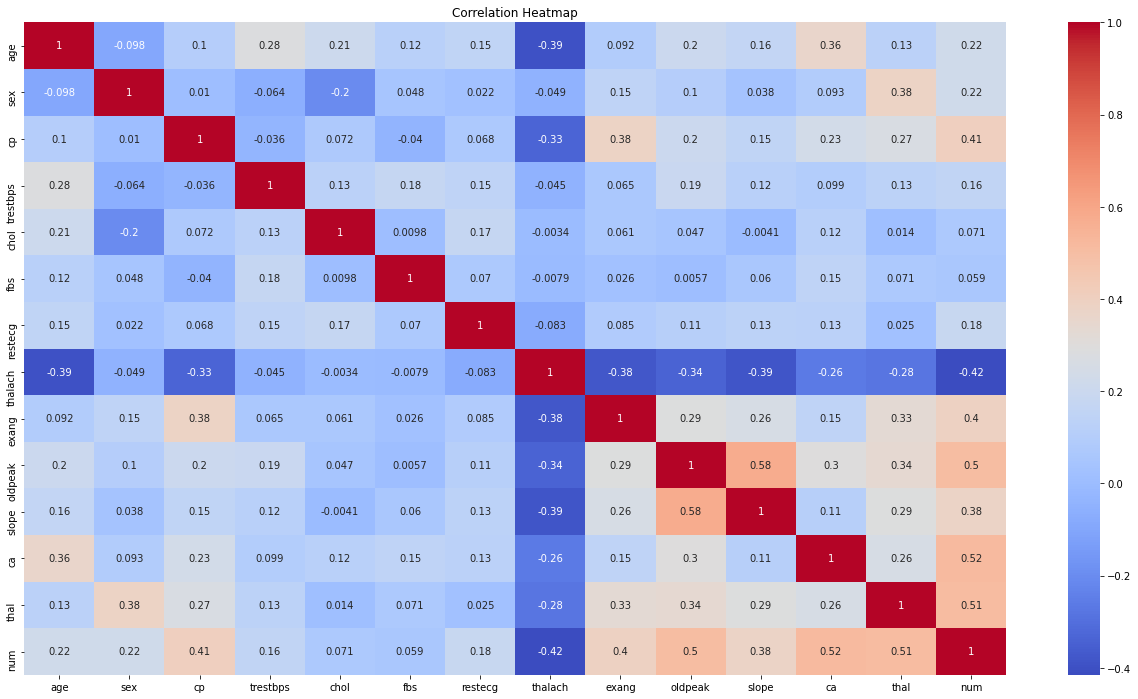

In [9]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Set the figure size
plt.figure(figsize=(22, 12))

# Plot the correlation matrix as a heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set title and show the plot
plt.title('Correlation Heatmap')
plt.show()


It seems like most features have positive correlation with num (target variable), except one, which is thalach

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

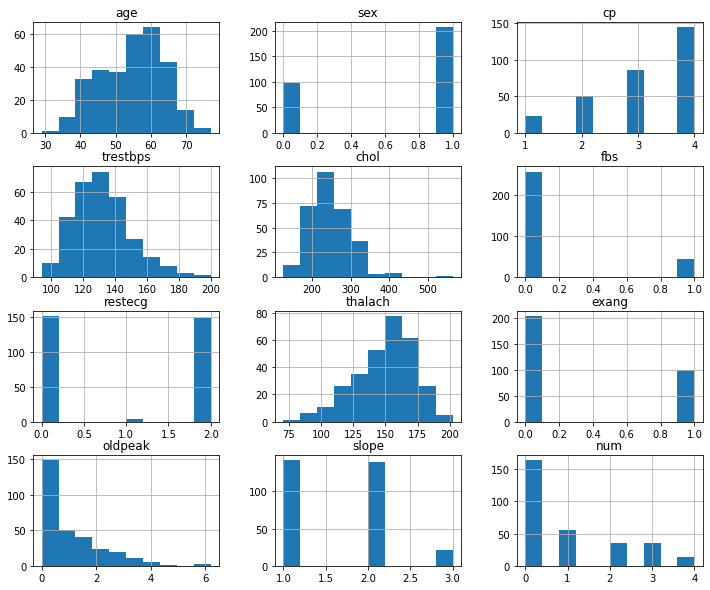

In [10]:
data.hist(figsize=(12, 10))


The next step will be to perform one-hot encoding on categorical columns in the data using the pd.get_dummies() function. One-hot encoding is a technique used to convert categorical variables into a binary matrix representation, which can be more suitable for machine learning algorithms that require numerical input.

In [11]:
categorical_columns = ["sex", "cp", "fbs", "exang", "restecg", "slope"]
data = pd.get_dummies(data, columns = categorical_columns)


The next step is to scale or standardize the numeerical variables because after looking at the histogram, different features have different scales. So, Scaling is done in the context of machine learning and data preprocessing to standardize or normalize the features of your dataset. (Mean = 0 and S.D = 1)

In [12]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])


In [13]:
# Separate features and target variable
y = data['num']
X = data.drop(['num'], axis=1)


## Missing Values
As we converted any values that were previously '?' to NAs, we need to fill in those values. I fitted the imputer on my feature data X using the .fit_transform() method. This method calculates the mean of each column with missing values and replaces those missing values with the calculated means.

In [14]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


## Dealing with the imbalanced classes for num
In the barplot for num(target variable), the distribution is unequal. So, I used a resample technique called RandomOverSampler, which oversamples the minority class by randomly replicating instances from the minority class to balance the class distribution.

In [15]:
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_imputed, y)


I used the fit_resample() method of the RandomOverSampler instance to resample the feature data (X_imputed) and target variable (y). This resampling process oversamples the minority class, creating synthetic copies of instances from the minority class to balance the class distribution.

In [16]:
# Scale the features using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.33, random_state=0)


## K-Nearest Neighbors Classifier


In [17]:
knn_scores = []
k_range = range(1, 21)  # Range of K values to try

for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)  # Use resampled data
    
    # Evaluate and store the model's performance
    knn_scores.append(knn_classifier.score(X_test, y_test))
    

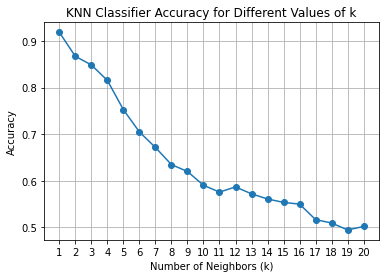

K = 1, Score = 0.9188191881918819
K = 2, Score = 0.8671586715867159
K = 3, Score = 0.8487084870848709
K = 4, Score = 0.8154981549815498
K = 5, Score = 0.7527675276752768
K = 6, Score = 0.7047970479704797
K = 7, Score = 0.6715867158671587
K = 8, Score = 0.6346863468634686
K = 9, Score = 0.6199261992619927
K = 10, Score = 0.5904059040590406
K = 11, Score = 0.5756457564575646
K = 12, Score = 0.5867158671586716
K = 13, Score = 0.5719557195571956
K = 14, Score = 0.5608856088560885
K = 15, Score = 0.5535055350553506
K = 16, Score = 0.5498154981549815
K = 17, Score = 0.5166051660516605
K = 18, Score = 0.5092250922509225
K = 19, Score = 0.4944649446494465
K = 20, Score = 0.5018450184501845


In [18]:
k_values = range(1, 21)
plt.plot(k_values, knn_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print the KNN scores
for k, score in enumerate(knn_scores, start=1):
    print(f"K = {k}, Score = {score}")
    

## Performing cross-validation for KNN Model

In [19]:
k_range = range(1, 21)  # Range of K values to try
knn_scores = []

for k in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    cross_val_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    
    # Calculate and store the mean score across all cross-validation folds
    mean_cv_score = cross_val_scores.mean()
    knn_scores.append(mean_cv_score)

# Print the cross-validation scores for each k value
for k, score in zip(k_range, knn_scores):
    print(f"K = {k}, Mean CV Score = {score:.4f}")

K = 1, Mean CV Score = 0.8944
K = 2, Mean CV Score = 0.8252
K = 3, Mean CV Score = 0.7942
K = 4, Mean CV Score = 0.7249
K = 5, Mean CV Score = 0.6630
K = 6, Mean CV Score = 0.6357
K = 7, Mean CV Score = 0.5992
K = 8, Mean CV Score = 0.5974
K = 9, Mean CV Score = 0.5974
K = 10, Mean CV Score = 0.5756
K = 11, Mean CV Score = 0.5611
K = 12, Mean CV Score = 0.5355
K = 13, Mean CV Score = 0.5392
K = 14, Mean CV Score = 0.5228
K = 15, Mean CV Score = 0.5247
K = 16, Mean CV Score = 0.5063
K = 17, Mean CV Score = 0.4955
K = 18, Mean CV Score = 0.4810
K = 19, Mean CV Score = 0.4646
K = 20, Mean CV Score = 0.4572


## Random Forest Classifier

In [20]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
    

Estimators = 10, Score = 0.9446
Estimators = 100, Score = 0.9446
Estimators = 200, Score = 0.9373
Estimators = 500, Score = 0.9410
Estimators = 1000, Score = 0.9410


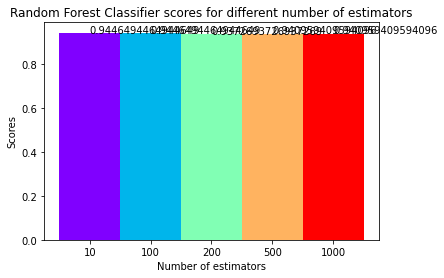

In [21]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 1)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

for estimator, score in zip(estimators, rf_scores):
    print(f"Estimators = {estimator}, Score = {score:.4f}")
    

## Performing cross-validation for the RandomForestClassifier model

In [22]:
# Define your classifier with chosen hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores for each fold
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold} - Score: {score:.4f}")

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cross_val_scores.mean()
std_cv_score = cross_val_scores.std()

print("Mean CV score:", mean_cv_score)
print("Standard deviation of CV scores:", std_cv_score)


Fold 1 - Score: 0.9000
Fold 2 - Score: 0.9273
Fold 3 - Score: 0.9000
Fold 4 - Score: 0.9000
Fold 5 - Score: 0.9174
Mean CV score: 0.9089407839866555
Standard deviation of CV scores: 0.011383848549428333


## Logistic Regression

In [23]:
logreg_model = LogisticRegression(max_iter = 1000)

# Train the model
logreg_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5535


**Based on the evaluation of three different machine learning algorithms – K-Nearest Neighbors, Random Forest, and Logistic Regression – on the given dataset, it is evident that the Random Forest model consistently achieves the highest and most stable accuracy scores across different numbers of estimators (10, 100, 200, 500, 1000). This indicates that the Random Forest algorithm effectively captures the underlying patterns within the data and produces accurate predictions on unseen instances. Consequently, among the tested algorithms, Random Forest stands out as the most promising and suitable choice for this specific problem of predicting heart disease based on the provided features. However, it's important to note that while accuracy is a crucial metric, it's recommended to consider other evaluation metrics and domain-specific considerations to make a well-informed decision regarding the final choice of model.**